# Assignment 1: Design a 4-bar linkage to follow target curve
> Wei Zhizhen, Hongyi Honour College, Student ID: 2020302191187

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# As is required:
a = 187 # Last 3 digits of Student ID
x = np.linspace(a/50,a/20,1000)
y = a*np.sin(x*a/100)+x**(a/300)

# Plotting original target curve
plt.figure(num=1,figsize=(8,5))
plt.plot(x,y,color='red',linewidth=1.0,linestyle='--')
plt.xlim(3,10)
plt.ylim(-200,200)
plt.title('Original Target Curve')
plt.xlabel('x')
plt.ylabel('y')

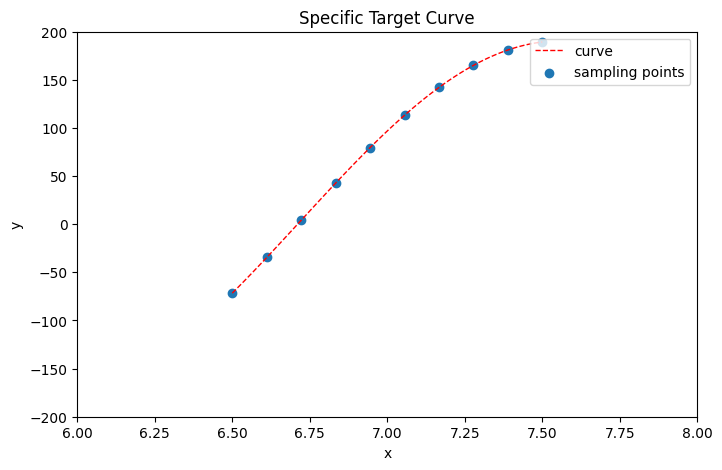

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Select segment in x range of [7,8] as specific target curve
a = 187
x_s = np.linspace(6.5,7.5,100)
y_s = a*np.sin(x_s*a/100)+x_s**(a/300)
x_t = np.linspace(6.5,7.5,10)
y_t = a*np.sin(x_t*a/100)+x_t**(a/300)
p = (complex(x_t[i],y_t[i]) for i in range(10))
plt.figure(num=2,figsize=(8,5))
plt.plot(x_s,y_s,color='red',linewidth=1.0,linestyle='--',label='curve')
plt.xlim(6,8)
plt.ylim(-200,200)
plt.title('Specific Target Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_t,y_t,label='sampling points')
plt.legend(loc='upper right')

In [32]:
from unittest import result
import numpy as np
import matplotlib.pyplot as plt
from math import pi,e
from scipy.optimize import minimize
deg = float("{0:.8f}".format(pi/180))
# deg_180 = 180*deg
# from sympy import symbols

# Dyad synthesis, for the left one:
beta = list((125-5*i)*deg for i in range(10))

# temporarily subsitute alphas with values in uniformed spacing
alpha = list((50-2*i)*deg for i in range(10))

delta = np.array([(x_t[i]-x_t[0]) (y_t[i]-y_t[0])] for i in range(10))

# Taking p_0 to p_1 as example, what happened to vectors and angles?
# w_1 = w_0 rotates @ beta_1-beta_0

# Set w[0] and z[0]
def obj(x):
        w_length, z_length, alpha = x[0], x[1], x[2]
        # w_length = 50
        w = list()
        w.append([w_length*np.cos(beta[0]),w_length*np.sin(beta[0])])
        w = list([w[0][1]*np.sin(beta[i]-beta[0])+w[0][0]*np.cos(beta[i]-beta[0]),w[0][1]*np.cos(beta[i]-beta[0])-w[0][0]*np.sin(beta[i]-beta[0])] for i in range (10))

        # z_length = 150
        z = list()
        z.append([z_length*np.cos(alpha[0]),z_length*np.sin(alpha[0])])
        z = list([z[0][1]*np.sin(alpha[i]-alpha[0])+z[0][0]*np.cos(alpha[i]-alpha[0]),z[0][1]*np.cos(alpha[i]-alpha[0])-z[0][0]*np.sin(alpha[i]-alpha[0])] for i in range (10))

        x_d = list((w[i][0]+z[i][0]) for i in range(10))
        y_d = list((w[i][1]+z[i][1]) for i in range(10))

        error = sum(list(((x_d[i]-x_s[i])**2 + (y_d[i]-y_s[i])**2) for i in range(10)))
        return error 

e = 1e-10

cons = ({'type':'ineq', 'fun': lambda x: x[0]-e},
        {'type':'ineq', 'fun': lambda x: x[1]-e},
        {'type':'ineq', 'fun': lambda x: 2*pi-x[2]-e},
        {'type':'ineq', 'fun': lambda x: x[2]-e}
        )
initial_guess = (1,1,1)
res = minimize(obj, initial_guess, method='COBYLA', constraints=cons)
print(res.w_length)
print(res.l_length)
print('Iteration success?:', res.success)
print(res.message)
# plt.plot(x_d,y_d,color='red',linewidth=1.0,linestyle='--',label='curve')
# plt.plot(x_s,y_s,color='blue',linewidth=1.0,linestyle='--',label='curve')





IndexError: invalid index to scalar variable.

In [11]:
import numpy as np
beta = list([(125-5*i), 2*i] for i in range(10))
print(beta[1][1])

2


In [29]:
# Trial for optimization method
from math import e
from this import d
from sympy import *
from scipy.optimize import minimize
# Impirically (or intuitively), choose initial values for ground and crank, fixed pivots @ (0,0) and (l4,0)
l1 = 120 # crank
l4 = 60 # ground

# l2, l3, phi = symbols('l2 l3 phi')
# x_b = (l4+l3*cos(phi))
# y_b = l3*sin(phi)+150

# The target of optimization is to minimize the distance between sampling points and corresponding points on designed trajectory 
e = 1e-10
# fun = lambda x: sum(list((x[1]+x[0]*cos(x[2])-x_t[i])**2+(x[0]*sin(x[2])-y_t[i])**2 for i in range(10)))
def fun(x):
        sum(list(((x_d[i]-x_s[i])**2 + (y_d[i]-y_s[i])**2) for i in range(10)))
        return d
# For the first time the target function is set as above, optimization message:
# l1 = 120, l4 = 60
# Length for coupler and follower, respectiely: [ 47.80210744 146.12217841]
# Iteration success?: True
# Optimization terminated successfully.
# The optimization result is actually not ideal, maybe the syntax is not working very well.
# Trial for 3 points:
#fun = lambda x: (x[1]+x[0]*cos(x[2])-x_t[0])**2+(x[0]*sin(x[2])-y_t[0])**2 + (x[1]+x[0]*cos(x[2])-x_t[1])**2+(x[0]*sin(x[2])-y_t[1])**2 + (x[1]+x[0]*cos(x[2])-x_t[2])**2+(x[0]*sin(x[2])-y_t[2])**2
# Not working. Error: Maximum number of function evaluations has been exceeded.
# Problem still to be found.
cons = ({'type':'ineq', 'fun': lambda x: x[0]**2+x[1]**2-(l1-l4)**2-1.2496*x[0]*x[1]-e},
        {'type':'ineq', 'fun': lambda x: (l1+l4)**2-x[0]**2-x[1]**2-1.2496*x[0]*x[1]-e},
        {'type':'ineq', 'fun': lambda x: x[0]-e},
        {'type':'ineq', 'fun': lambda x: x[1]-e},
        {'type':'ineq', 'fun': lambda x: 2*pi-x[2]-e},
        {'type':'ineq', 'fun': lambda x: x[2]-e}
        )
x0 = np.array((30, 100, 1.5))
res = minimize(fun, x0, method='COBYLA', constraints=cons)
print('Length for coupler and follower, respectiely:', res.x[0:2])
print('Iteration success?:', res.success)
print(res.message)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


TypeError: fun() takes 0 positional arguments but 1 was given